(3, 64, 64, 64)


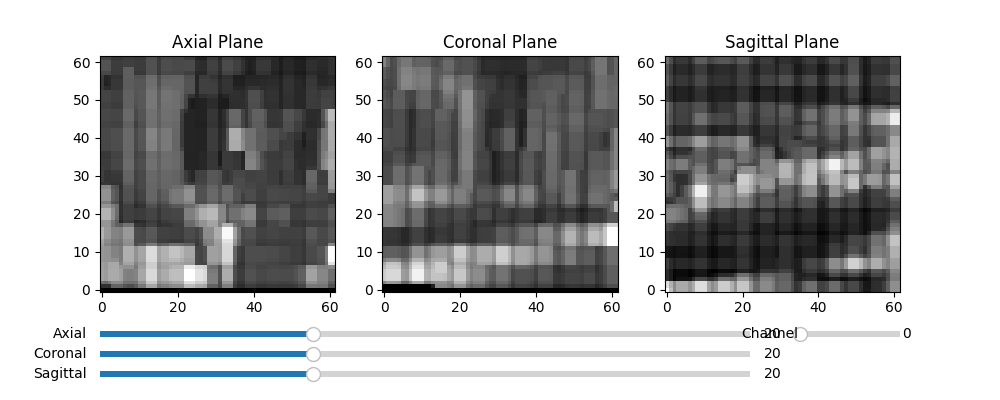

In [1]:
# Ensure the interactive backend is set for Jupyter Notebook
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import torch
import gzip
import torch.nn.functional as F

file_path = "/Data/RSNA/processed_studies/4003253_l1_l2_64_64_64.npy.gz"

# Open the gzipped file and load it as a numpy array
with gzip.open(file_path, 'rb') as f:
    volume = np.load(f)
    
kernel_size = (3, 3, 3)  # Downsampling factor for each dimension
stride = (1, 1, 1)       # Stride of the pooling operation
print(volume.shape)
# volume = np.transpose(volume, (3,0,1,2))
# Apply 3D max pooling
volume = F.max_pool3d(torch.tensor(volume), kernel_size=kernel_size, stride=stride)

# Initial slice indices and channel
init_axial = 20
init_coronal = 20
init_sagittal = 20
init_channel = 0

# Create a figure with three subplots for the three planes
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.25)

# Display initial slices
axial_img = ax[0].imshow(volume[init_channel, :, :, init_axial], cmap='gray', origin='lower')
coronal_img = ax[1].imshow(volume[init_channel, :, init_coronal, :], cmap='gray', origin='lower')
sagittal_img = ax[2].imshow(volume[init_channel, init_sagittal, :, :], cmap='gray', origin='lower')

# Set titles for each plane
ax[0].set_title('Axial Plane')
ax[1].set_title('Coronal Plane')
ax[2].set_title('Sagittal Plane')

# Set up sliders for each plane and channel selection
ax_axial = plt.axes([0.1, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_coronal = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_sagittal = plt.axes([0.1, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_channel = plt.axes([0.8, 0.15, 0.1, 0.03], facecolor='lightgoldenrodyellow')

slider_axial = Slider(ax_axial, 'Axial', 0, volume.shape[3] - 1, valinit=init_axial, valstep=1)
slider_coronal = Slider(ax_coronal, 'Coronal', 0, volume.shape[2] - 1, valinit=init_coronal, valstep=1)
slider_sagittal = Slider(ax_sagittal, 'Sagittal', 0, volume.shape[1] - 1, valinit=init_sagittal, valstep=1)
slider_channel = Slider(ax_channel, 'Channel', 0, volume.shape[0] - 1, valinit=init_channel, valstep=1)

# Update function to redraw the slices and move the red lines based on the slider values
def update(val):
    axial_idx = int(slider_axial.val)
    coronal_idx = int(slider_coronal.val)
    sagittal_idx = int(slider_sagittal.val)
    channel_idx = int(slider_channel.val)

    # Update the images in the subplots
    axial_img.set_data(volume[channel_idx, :, :, axial_idx])
    coronal_img.set_data(volume[channel_idx, :, coronal_idx, :])
    sagittal_img.set_data(volume[channel_idx, sagittal_idx, :, :])

    fig.canvas.draw_idle()

# Attach the update function to the sliders
slider_axial.on_changed(update)
slider_coronal.on_changed(update)
slider_sagittal.on_changed(update)
slider_channel.on_changed(update)

plt.show()
